# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.

**Цель исследования**
* изучение рынка недвижимости Санкт-Петербурга на основе анализа различных факторов: цена объекта, общая площадь, удаленность от города, расстояние до ближайшего аэропорта, и т.д.
* изучим, как быстро продавались квартиры
* узнаем, какие факторы влияют на общую (полную) стоимость объекта
* найдем населенные пункты с самой высокой и низкой стоимостью
* узнаем, как стоимость объекта зависит от расстояния до центра города

**Ход исследования**
1. Обзор данных
2. Предобработка данных
3. Добавление новых данных к уже имеющимся
4. Проведение исследовательского анализа
5. Общий вывод

**Описание данных**
* airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
* balcony — число балконов
* ceiling_height — высота потолков (м)
* cityCenters_nearest — расстояние до центра города (м)
* days_exposition — сколько дней было размещено объявление (от публикации до снятия)
* first_day_exposition — дата публикации
* floor — этаж
* floors_total — всего этажей в доме
* is_apartment — апартаменты (булев тип)
* kitchen_area — площадь кухни в квадратных метрах (м²)
* last_price — цена на момент снятия с публикации
* living_area — жилая площадь в квадратных метрах (м²)
* locality_name — название населённого пункта
* open_plan — свободная планировка (булев тип)
* parks_around3000 — число парков в радиусе 3 км
* parks_nearest — расстояние до ближайшего парка (м)
* ponds_around3000 — число водоёмов в радиусе 3 км
* ponds_nearest — расстояние до ближайшего водоёма (м)
* rooms — число комнат
* studio — квартира-студия (булев тип)
* total_area — общая площадь квартиры в квадратных метрах (м²)
* total_images — число фотографий квартиры в объявлении

### Откройте файл с данными и изучите общую информацию. 

Подключим необходимые библиотеки

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np

Корректируем вывод табличных данных

In [2]:
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',100)

Загрузим данные из файла в датафрейм

In [3]:
try:
    real_estate_data = pd.read_csv('/datasets/real_estate_data.csv', sep="\t")
except:
    real_estate_data = pd.read_csv('https://code.s3.yandex.net/datasets//real_estate_data.csv', sep="\t")

# посмотрим первые 5 строк с данными
display(real_estate_data.head())

# посмотрим последние 5 строк с данными
display(real_estate_data.tail())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.7,5.0,73.3,3,NaN,False,False,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,False,False,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,False,False,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.0,17.0,NaN,12,NaN,False,False,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0
23698,4,1350000.0,32.30,2017-07-21T00:00:00,1,2.5,5.0,12.3,1,NaN,False,False,9.00,NaN,поселок Новый Учхоз,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Изучим общую информацию о полученном датафрейме

In [4]:
real_estate_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Узнаем в каких столбцах встречаются пропуски

In [5]:
real_estate_data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Проверим колличество пропусков в %

In [6]:
display(pd.DataFrame(round(real_estate_data.isna().mean().round(2) *100,)).style.background_gradient('coolwarm'))

,0
total_images,0.000000
last_price,0.000000
total_area,0.000000
first_day_exposition,0.000000
rooms,0.000000
ceiling_height,39.000000
floors_total,0.000000
living_area,8.000000
floor,0.000000
is_apartment,88.000000


Большое количество пропусков можно наблюдать в столбцах:

* is_apartment - 88 %
    
* parks_nearest и ponds_nearest: более 60-ти %
    
* balcony - 49 %
    
* ceiling_height - 39 %

Посмотрим основные характеристики числовых значений

In [7]:
real_estate_data.describe().astype('int')

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699,23699,23699,23699,14504,23613,21796,23699,21421,12180,18157,18180,18181,8079,18181,9110,20518
mean,9,6541548,60,2,2,10,34,5,10,1,28793,14191,0,490,0,517,180
std,5,10887013,35,1,1,6,22,4,5,1,12630,8608,0,342,0,277,219
min,0,12190,12,0,1,1,2,1,1,0,0,181,0,1,0,13,1
25%,6,3400000,40,1,2,5,18,2,7,0,18585,9238,0,288,0,294,45
50%,9,4650000,52,2,2,9,30,4,9,1,26726,13098,0,455,1,502,95
75%,14,6800000,69,3,2,16,42,8,12,2,37273,16293,1,612,1,729,232
max,50,763000000,900,19,100,60,409,33,112,5,84869,65968,3,3190,3,1344,1580


Построим общую гистограмму для всех числовых столбцов таблицы

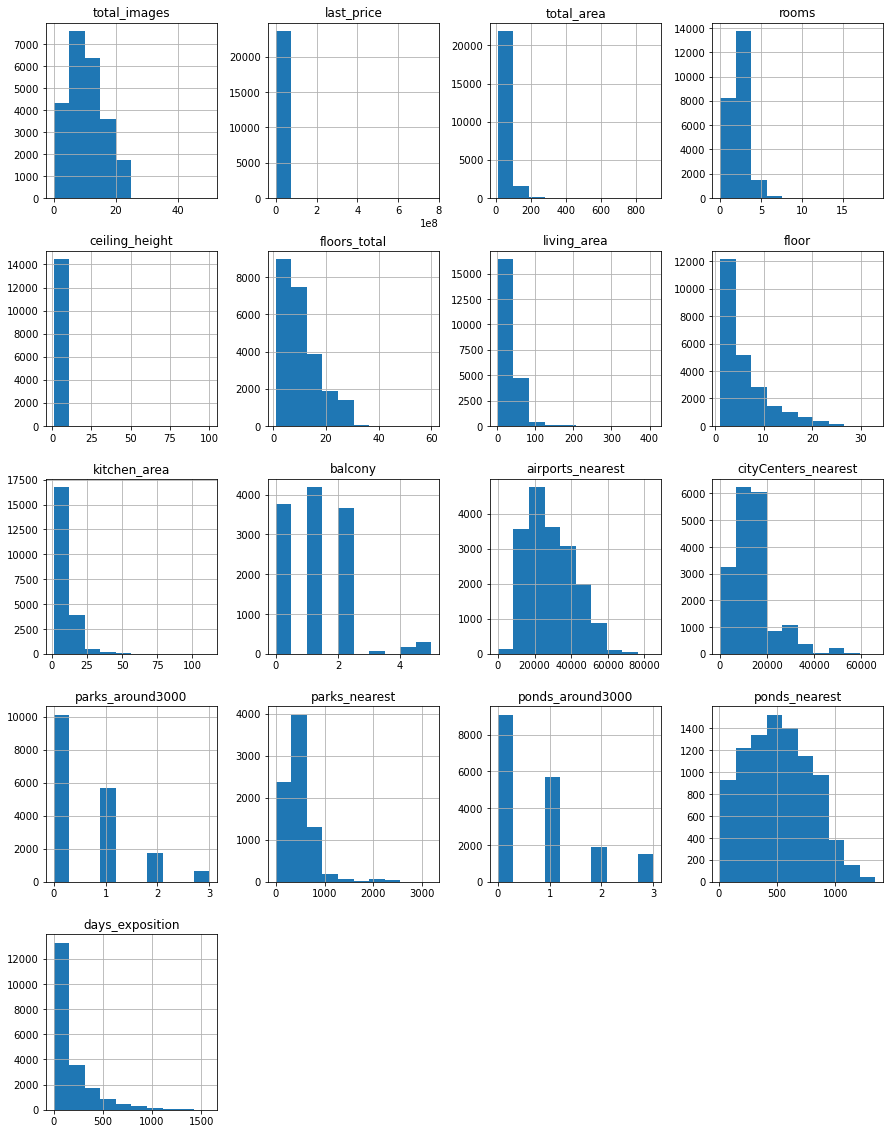

In [8]:
real_estate_data.hist(figsize=(15, 20))
plt.show()

**Первые выводы:**

* first_day_exposition - тип должен быть datetime
* floors_total - тип должен быть int
* parks_around3000 - тип должен быть int
* ponds_around3000 - тип должен быть int
* days_exposition - тип должен быть int
* is_apartment - должен быть тип bool
* ceiling_height - нулевые значения
* floors_total - нулевые значения
* is_apartment - нулевые значения
* living_area - нулевые значения
* kitchen_area - нулевые значения
* balcony - нулевые значения
* locality_name - нулевые значения
* airports_nearest - нулевые значения
* cityCenters_nearest - нулевые значения
* parks_around3000 - нулевые значения
* parks_nearest - нулевые значения
* ponds_around3000 - нулевые значения
* ponds_nearest - нулевые значения
* days_exposition - нулевые значения

### Предобработка данных

Как любой начинающий аналитик, ты работаешь не с самой базой данных - с витриной, поэтому создадим новый рабочий датафрейм во избежание случайной потери данных

In [9]:
data = real_estate_data

Узнаем уникальные значения по каждому столбцу

In [10]:
for column in data.columns:
    print(column)
    print(data[column].unique())
    print()

total_images
[20  7 10  0  2  6  5 18  9  1 16 11  8 12 13  3 15 17 14 19 32  4 35 39
 23 21 27 30 24 25 28 31 22 29 26 50 42 37]

last_price
[13000000.  3350000.  5196000. ...  6151120. 21400000. 11475000.]

total_area
[108.    40.4   56.   ...  66.86 133.81  76.75]

first_day_exposition
['2019-03-07T00:00:00' '2018-12-04T00:00:00' '2015-08-20T00:00:00' ...
 '2014-12-29T00:00:00' '2016-09-12T00:00:00' '2015-07-19T00:00:00']

rooms
[ 3  1  2  4  5  6  0  7 11  8 14 10 15  9 19 16 12]

ceiling_height
[  2.7     nan   3.03   2.5    2.67   2.56   3.05   2.75   2.6    2.9
   2.8    2.55   3.     2.65   3.2    2.61   3.25   3.45   2.77   2.85
   2.64   2.57   4.15   3.5    3.3    2.71   4.     2.47   2.73   2.84
   3.1    2.34   3.4    3.06   2.72   2.54   2.51   2.78   2.76  25.
   2.58   3.7    2.52   5.2    2.87   2.66   2.59   2.     2.45   3.6
   2.92   3.11   3.13   3.8    3.15   3.55   3.16   3.62   3.12   2.53
   2.74   2.96   2.46   5.3    5.     2.79   2.95   4.06   2.94   3.82
  

Изменим формат столбца 'first_day_exposition' при помощи библиотеки pandas: точное время отправки на сайт не важно, нужен только день

In [11]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%d')

# посмотрим как изменился датафрейм
display(data.head(3))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.7,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0


Для удобства восприятия приведем в целочисленный тип стоимость квартиры методом astype

In [12]:
data['last_price'] = data['last_price'].astype(int)
display(data.head(3))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108.0,2019-03-07,3,2.7,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000,40.4,2018-12-04,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000,56.0,2015-08-20,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0


Рассмотрим некоторые пропуски нашего датафрейма, которые не сильно влияют на наше исследование:
* is_apartment - апартаменты (булев тип) - заменим пропуски на False
* balcony - число балконов, заменим пропуски на 0

parks_around3000 и ponds_around3000 далее пересчитал относительно локации

In [13]:
data['is_apartment'] = data['is_apartment'].fillna(False).astype(bool)
data['balcony'] = data['balcony'].fillna(0).astype(int)
# data['parks_around3000'] = data['parks_around3000'].fillna(0).astype(int)
# data['ponds_around3000'] = data['ponds_around3000'].fillna(0).astype(int)

# приведём наименования столбцов в однотипный формат
data.rename(columns = {'parks_around3000':'parks_around_3000'}, inplace=True)
data.rename(columns = {'ponds_around3000':'ponds_around_3000'}, inplace=True)
data.rename(columns = {'cityCenters_nearest':'city_centers_nearest'}, inplace=True)

# посмотрим оставшиеся пропуски
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around_3000        5518
parks_nearest           15620
ponds_around_3000        5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Остались пропуски в таких столбцах, как:
* ceiling_height - высота потолков (м)
* floors_total - всего этажей в доме
* living_area - жилая площадь в квадратных метрах (м²)
* kitchen_area - площадь кухни в квадратных метрах (м²)
* locality_name - название населённого пункта
* airports_nearest - расстояние до ближайшего аэропорта в метрах (м)
* city_centers_nearest - расстояние до центра города (м)
* parks_nearest - расстояние до ближайшего парка (м)
* ponds_nearest - расстояние до ближайшего водоёма (м)
* days_exposition - сколько дней было размещено объявление (от публикации до снятия)

Пропуски в **ceiling_height**: посмотрим список уникальных значений этого столбца

In [14]:
print(sorted(data['ceiling_height'].unique()))

[1.0, 2.0, 2.3, 2.4, 2.45, 2.46, 2.48, 2.53, 2.59, 2.62, 2.63, 2.7, nan, 1.2, 1.75, 2.2, 2.25, 2.34, 2.47, 2.49, 2.5, 2.51, 2.52, 2.54, 2.55, 2.56, 2.57, 2.58, 2.6, 2.61, 2.64, 2.65, 2.66, 2.67, 2.68, 2.69, 2.71, 2.72, 2.73, 2.74, 2.75, 2.76, 2.77, 2.78, 2.79, 2.8, 2.81, 2.82, 2.83, 2.84, 2.85, 2.86, 2.87, 2.88, 2.89, 2.9, 2.91, 2.92, 2.93, 2.94, 2.95, 2.96, 2.97, 2.98, 2.99, 3.0, 3.01, 3.02, 3.03, 3.04, 3.05, 3.06, 3.07, 3.08, 3.09, 3.1, 3.11, 3.12, 3.13, 3.14, 3.15, 3.16, 3.17, 3.18, 3.2, 3.21, 3.22, 3.23, 3.24, 3.25, 3.26, 3.27, 3.28, 3.29, 3.3, 3.31, 3.32, 3.33, 3.34, 3.35, 3.36, 3.37, 3.38, 3.39, 3.4, 3.42, 3.43, 3.44, 3.45, 3.46, 3.47, 3.48, 3.49, 3.5, 3.51, 3.52, 3.53, 3.54, 3.55, 3.56, 3.57, 3.58, 3.59, 3.6, 3.62, 3.63, 3.65, 3.66, 3.67, 3.68, 3.69, 3.7, 3.75, 3.76, 3.78, 3.8, 3.82, 3.83, 3.84, 3.85, 3.86, 3.87, 3.88, 3.9, 3.93, 3.95, 3.98, 4.0, 4.06, 4.1, 4.14, 4.15, 4.19, 4.2, 4.25, 4.3, 4.37, 4.4, 4.45, 4.5, 4.65, 4.7, 4.8, 4.9, 5.0, 5.2, 5.3, 5.5, 5.6, 5.8, 6.0, 8.0, 8.3, 1

Видим очень большой разброс показателей: от 1 до 100 метров (вот почему не "подъезд", а "парадная")

In [15]:
print('Среднее значение:', data['ceiling_height'].mean())
print('Медианное значение:', data['ceiling_height'].median())

Среднее значение: 2.7714988968559835
Медианное значение: 2.65


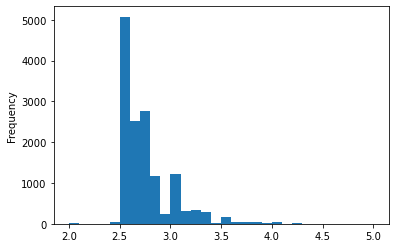

In [16]:
data['ceiling_height'].sort_values().plot(y = 'ceiling_height', kind = 'hist', bins = 30, range=(2,5))
plt.show()

Медиана от среднего значения отличается не сильно из-за выбросов во всей выборке, поэтому присвоим ее пропущенным значениям

In [17]:
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())

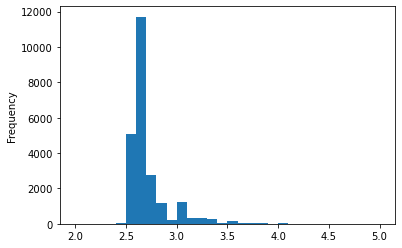

In [18]:
# проверим снова
data['ceiling_height'].sort_values().plot(y = 'ceiling_height', kind = 'hist', bins = 30, range=(2,5))
plt.show()

Пропуски в **floors_total**: будем считать указанный в объявлении этаж последним в доме

In [19]:
# заменим пропуски на 0
data['floors_total'] = data['floors_total'].fillna(0)

# дому с количеством этажей 0 присвоим этажность квартиры из объявления
def all_floors_total(row):
    if row[6] == 0:
        row[6] = row[8]
    return row

data = data.apply(all_floors_total, axis=1)

# приведем этажность к целочисленному типу
data['floors_total'] = data['floors_total'].astype(int)

Пропуски в **living_area** и **kitchen_area**:

In [20]:
display(data['living_area'].agg(['min','max','mean','median']))
display(data['kitchen_area'].agg(['min','max','mean','median']))

min         2.000000
max       409.700000
mean       34.457852
median     30.000000
Name: living_area, dtype: float64

min         1.300000
max       112.000000
mean       10.569807
median      9.100000
Name: kitchen_area, dtype: float64

Заменим пустые значения жилой площади и площади кухни: для этого узнаем отношения этих значений к общей площади

In [21]:
living_ratio = data['living_area'].mean() / data['total_area'].mean()
kitchen_ratio = data['kitchen_area'].mean() / data['total_area'].mean()

data['living_area'].fillna(living_ratio * data['total_area'], inplace=True)
data['kitchen_area'].fillna(kitchen_ratio * data['total_area'], inplace=True)

Пропуски в **locality_name**:

In [22]:
print('Количество строк датасета:', data.shape[0])
print('Количество пропущенных значений locality_name:', data['locality_name'].isna().sum())

Количество строк датасета: 23699
Количество пропущенных значений locality_name: 49


Потеряных значений всего 49, для 23 699 строк это ничтожно малое количество - удалим их

In [23]:
data.dropna(subset=['locality_name'], inplace=True)

print('Старое количество строк:', real_estate_data.shape[0])
print('Новое количество строк:', data.shape[0])

Старое количество строк: 23699
Новое количество строк: 23650


Узнаем уникальные значения столбца

In [24]:
sorted(data['locality_name'].unique())

['Бокситогорск',
 'Волосово',
 'Волхов',
 'Всеволожск',
 'Выборг',
 'Высоцк',
 'Гатчина',
 'Зеленогорск',
 'Ивангород',
 'Каменногорск',
 'Кингисепп',
 'Кириши',
 'Кировск',
 'Колпино',
 'Коммунар',
 'Красное Село',
 'Кронштадт',
 'Кудрово',
 'Лодейное Поле',
 'Ломоносов',
 'Луга',
 'Любань',
 'Мурино',
 'Никольское',
 'Новая Ладога',
 'Отрадное',
 'Павловск',
 'Петергоф',
 'Пикалёво',
 'Подпорожье',
 'Приморск',
 'Приозерск',
 'Пушкин',
 'Санкт-Петербург',
 'Светогорск',
 'Сертолово',
 'Сестрорецк',
 'Сланцы',
 'Сосновый Бор',
 'Сясьстрой',
 'Тихвин',
 'Тосно',
 'Шлиссельбург',
 'городской поселок Большая Ижора',
 'городской поселок Янино-1',
 'городской посёлок Будогощь',
 'городской посёлок Виллози',
 'городской посёлок Лесогорский',
 'городской посёлок Мга',
 'городской посёлок Назия',
 'городской посёлок Новоселье',
 'городской посёлок Павлово',
 'городской посёлок Рощино',
 'городской посёлок Свирьстрой',
 'городской посёлок Советский',
 'городской посёлок Фёдоровское',
 'городск

Удалим из названий населенных пунктов лишнее: поселок, товарищество и т.д. - для этого создадим список "лишнего" и в цикле пройдем по столбцу с названиями

In [25]:
names = ['посёлок ', 'поселок ', 'городского типа ', 'садоводческое некоммерческое ' , 'товарищество ', 'станции ',
         'садовое ', 'городской ', 'при железнодорожной станции ', 'деревня ', 'коттеджный ', 'село ']

for i in names: 
    data['locality_name'] = data['locality_name'].str.replace(i,'')
       
display(data['locality_name'].value_counts())

Санкт-Петербург    15721
Мурино               590
Кудрово              472
Шушары               440
Всеволожск           398
                   ...  
Алексеевка             1
Белоостров             1
Пельгора               1
Каложицы               1
Дзержинского           1
Name: locality_name, Length: 307, dtype: int64

In [26]:
sorted(data['locality_name'].unique())

['Агалатово',
 'Александровская',
 'Алексеевка',
 'Аннино',
 'Аро',
 'Барышево',
 'Батово',
 'Бегуницы',
 'Белогорка',
 'Белоостров',
 'Бокситогорск',
 'Большая Вруда',
 'Большая Ижора',
 'Большая Пустомержа',
 'Большие Колпаны',
 'Большое Рейзино',
 'Большой Сабск',
 'Бор',
 'Борисова Грива',
 'Бугры',
 'Будогощь',
 'Ваганово',
 'Важины',
 'Вартемяги',
 'Вахнова Кара',
 'Вещево',
 'Виллози',
 'Вознесенье',
 'Возрождение',
 'Войсковицы',
 'Войскорово',
 'Володарское',
 'Волосово',
 'Волхов',
 'Всеволожск',
 'Выборг',
 'Вырица',
 'Выскатка',
 'Высокоключевой',
 'Высоцк',
 'Гаврилово',
 'Гарболово',
 'Гатчина',
 'Гладкое',
 'Глажево',
 'Глебычево',
 'Глинка',
 'Гончарово',
 'Горбунки',
 'Гостилицы',
 'Громово',
 'Дзержинского',
 'Дружная Горка',
 'Дружноселье',
 'Дубровка',
 'Елизаветино',
 'Ефимовский',
 'Жилгородок',
 'Жилпосёлок',
 'Житково',
 'Заводской',
 'Заклинье',
 'Заневка',
 'Запорожское',
 'Зеленогорск',
 'Зимитицы',
 'Ивангород',
 'Извара',
 'Ильичёво',
 'Иссад',
 'Калитино',

Узнаем, осталишь ли еще дубликаты

In [27]:
data.duplicated().sum()

0

Пропуски в:
* **airports_nearest**
* **city_centers_nearest**
* **parks_nearest**
* **parks_around_3000**   
* **ponds_nearest**
* **ponds_around_3000**

In [28]:
# заменим пропущенные значения относительно известных нам районов
data['airports_nearest'] = \
    data['airports_nearest'].fillna(data.groupby('locality_name')['airports_nearest'].transform('median'))

data['city_centers_nearest'] = \
    data['city_centers_nearest'].fillna(data.groupby('locality_name')['city_centers_nearest'].transform('median'))

data['parks_nearest'] = \
    data['parks_nearest'].fillna(data.groupby('locality_name')['parks_nearest'].transform('median'))

data['parks_around_3000'] = \
    data['parks_around_3000'].fillna(data.groupby('locality_name')['parks_around_3000'].transform('median'))

data['ponds_nearest'] = \
    data['ponds_nearest'].fillna(data.groupby('locality_name')['ponds_nearest'].transform('median'))

data['ponds_around_3000'] = \
    data['ponds_around_3000'].fillna(data.groupby('locality_name')['ponds_around_3000'].transform('median'))

In [29]:
display(pd.DataFrame(round(data.isna().mean()*100,)).style.background_gradient('coolwarm'))

,0
total_images,0.000000
last_price,0.000000
total_area,0.000000
first_day_exposition,0.000000
rooms,0.000000
ceiling_height,0.000000
floors_total,0.000000
living_area,0.000000
floor,0.000000
is_apartment,0.000000


все еще много пропусков: проверим медиану и среднее по этим столбцам

airports_nearest
Среднее значение: 29545.41799054248
Медианное значение: 27223.0


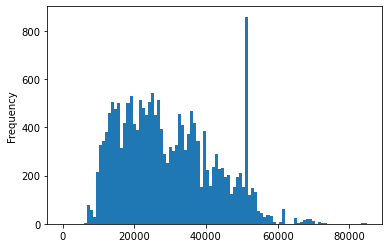


city_centers_nearest
Среднее значение: 14465.349290685936
Медианное значение: 13270.0


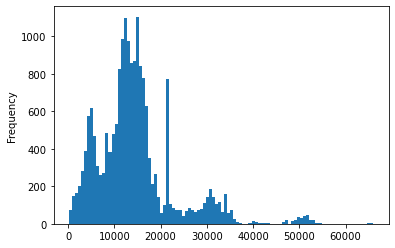


parks_nearest
Среднее значение: 475.9663210967596
Медианное значение: 460.0


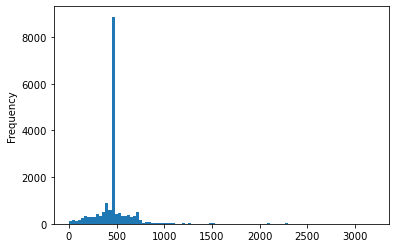


parks_around_3000
Среднее значение: 0.5895542213484937
Медианное значение: 0.0


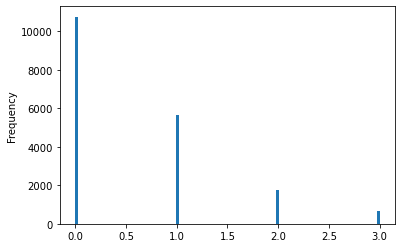


ponds_nearest
Среднее значение: 498.2349828986747
Медианное значение: 503.0


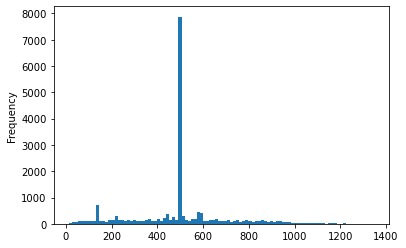


ponds_around_3000
Среднее значение: 0.8077679188140906
Медианное значение: 1.0


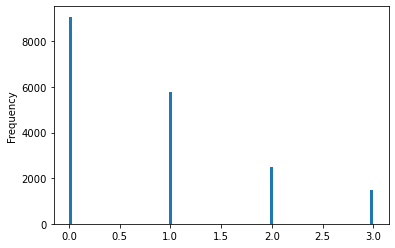

In [30]:
new_data = data[['airports_nearest', 'city_centers_nearest', 'parks_nearest', \
                    'parks_around_3000', 'ponds_nearest', 'ponds_around_3000']]

for col in new_data.columns:
    print(col)
    print('Среднее значение:', data[col].mean())
    print('Медианное значение:', data[col].median())
    data[col].sort_values().plot(y = col, kind = 'hist', bins = 100)
    plt.show()
    print()

In [31]:
# в 4х столбцах медиана и среднее почти равны: заменим оставшиеся пропуски
data['airports_nearest'] = data['airports_nearest'].fillna(data['airports_nearest'].median()).astype(int)
data['city_centers_nearest'] = data['city_centers_nearest'].fillna(data['city_centers_nearest'].median()).astype(int)
data['parks_nearest'] = data['parks_nearest'].fillna(data['parks_nearest'].median()).astype(int)
data['ponds_nearest'] = data['ponds_nearest'].fillna(data['ponds_nearest'].median()).astype(int)

# в оставшихся замена медианным значением будет некорректна: множим на 0
data['parks_around_3000'] = data['parks_around_3000'].fillna(0).astype(int)
data['ponds_around_3000'] = data['ponds_around_3000'].fillna(0).astype(int)

Сколько осталось пропусков в финале

In [32]:
data.isna().sum()

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height             0
floors_total               0
living_area                0
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area               0
balcony                    0
locality_name              0
airports_nearest           0
city_centers_nearest       0
parks_around_3000          0
parks_nearest              0
ponds_around_3000          0
ponds_nearest              0
days_exposition         3180
dtype: int64

In [33]:
print('До обработки данных:')
display(pd.DataFrame(round(real_estate_data.isna().mean()*100,)).style.background_gradient('coolwarm'))
print('После обработки данных:')
display(pd.DataFrame(round(data.isna().mean()*100,)).style.background_gradient('coolwarm'))

До обработки данных:


,0
total_images,0.000000
last_price,0.000000
total_area,0.000000
first_day_exposition,0.000000
rooms,0.000000
ceiling_height,0.000000
floors_total,0.000000
living_area,8.000000
floor,0.000000
is_apartment,0.000000


После обработки данных:


,0
total_images,0.000000
last_price,0.000000
total_area,0.000000
first_day_exposition,0.000000
rooms,0.000000
ceiling_height,0.000000
floors_total,0.000000
living_area,0.000000
floor,0.000000
is_apartment,0.000000


Рассмотрим наш обновленный датафрейм с точки зрения возможных аномалий (выбросов)

<AxesSubplot:ylabel='days_exposition'>

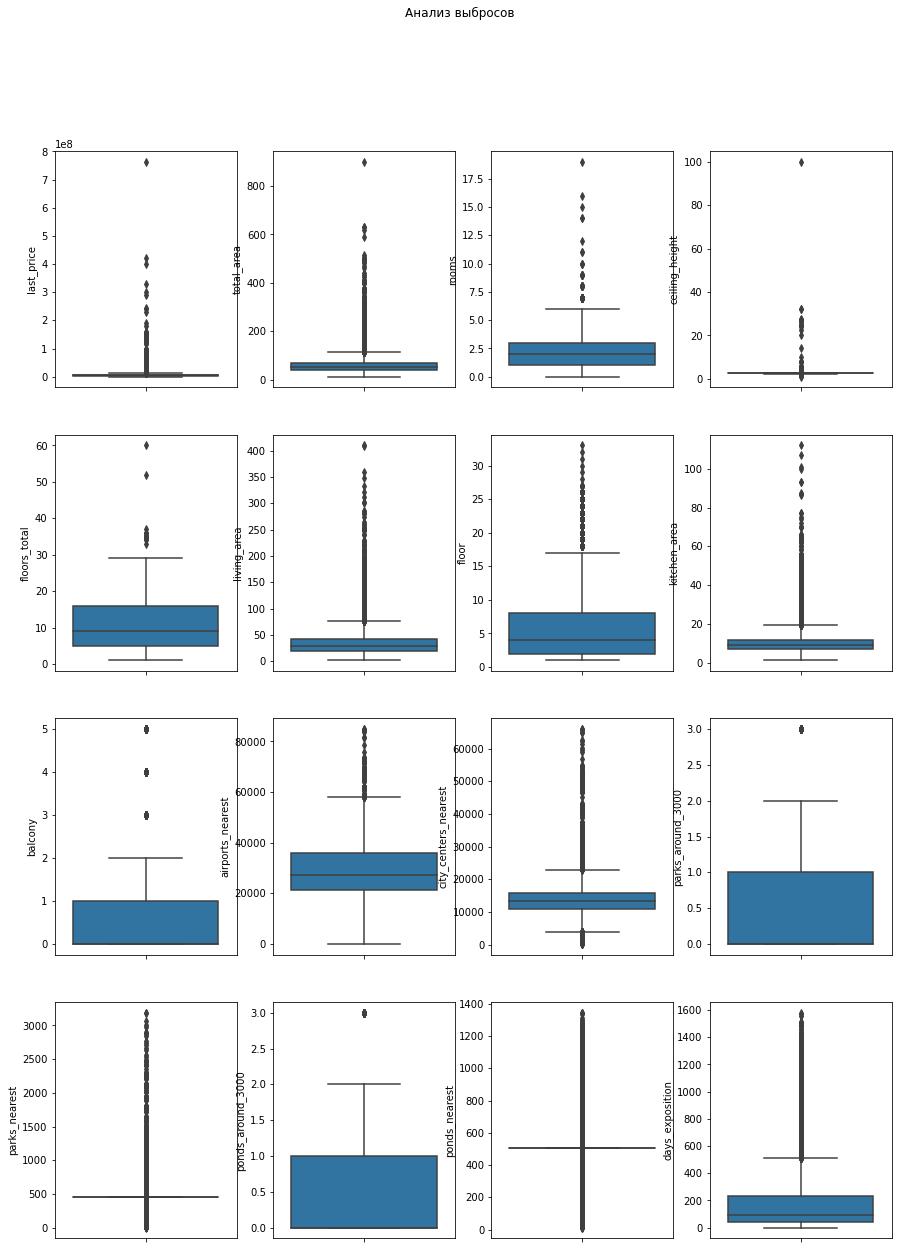

In [34]:
fig, ax = plt.subplots(4, 4, figsize=(15, 20))
fig.suptitle('Анализ выбросов')
sns.boxplot(y=data['last_price'], ax=ax[0,0])
sns.boxplot(y=data['total_area'], ax=ax[0,1])
sns.boxplot(y=data['rooms'], ax=ax[0,2])
sns.boxplot(y=data['ceiling_height'], ax=ax[0,3])
sns.boxplot(y=data['floors_total'], ax=ax[1,0])
sns.boxplot(y=data['living_area'], ax=ax[1,1])
sns.boxplot(y=data['floor'], ax=ax[1,2])
sns.boxplot(y=data['kitchen_area'], ax=ax[1,3])
sns.boxplot(y=data['balcony'], ax=ax[2,0])
sns.boxplot(y=data['airports_nearest'], ax=ax[2,1])
sns.boxplot(y=data['city_centers_nearest'], ax=ax[2,2])
sns.boxplot(y=data['parks_around_3000'], ax=ax[2,3])
sns.boxplot(y=data['parks_nearest'], ax=ax[3,0])
sns.boxplot(y=data['ponds_around_3000'], ax=ax[3,1])
sns.boxplot(y=data['ponds_nearest'], ax=ax[3,2])
sns.boxplot(y=data['days_exposition'], ax=ax[3,3])

Размаха много, конкретики мало: посмотрим числовые значения

In [35]:
display(data.describe())

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
count,23650.000000,2.365000e+04,23650.000000,23650.000000,23650.000000,23650.000000,23650.000000,23650.000000,23650.000000,23650.000000,23650.000000,23650.000000,23650.000000,23650.000000,23650.000000,23650.000000,20470.000000
mean,9.862326,6.541127e+06,60.329069,2.070106,2.724311,10.673784,34.582279,5.893277,10.502873,0.591712,29071.210782,14221.274292,0.469175,471.910740,0.642833,499.220254,180.753200
std,5.682278,1.089640e+07,35.661808,1.078620,0.989255,6.593455,22.359584,4.883317,6.037438,0.959662,11697.073104,7682.753840,0.748518,203.705838,0.904553,184.536696,219.777916
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.600000,5.000000,19.000000,2.000000,7.000000,0.000000,21160.000000,10939.000000,0.000000,460.000000,0.000000,503.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.000000,0.000000,27223.000000,13270.000000,0.000000,460.000000,0.000000,503.000000,95.000000
75%,14.000000,6.799000e+06,69.700000,3.000000,2.700000,16.000000,42.100000,8.000000,12.000000,1.000000,35841.000000,15743.000000,1.000000,460.000000,1.000000,503.000000,231.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [36]:
# создадим функцию, обнуляющую наши выбросы с учетом границ в 1.5 размаха
def func_quart(df, column):
    # нижний квартиль
    q1 = df[column].quantile(0.25)
    # верхний квартиль
    q3 = df[column].quantile(0.75)
    # интерквартильный размах
    iqr = q3 - q1
    # срез
    return df.loc[(df[column] < q3 + 1.5*iqr) & (df[column] > q1 - 1.5*iqr), column]

# список столбцов с интересующими нас аномалиями
drop_list = [
    'ceiling_height',
    'floors_total',
    'parks_around_3000',
    'ponds_around_3000']

for col in drop_list:
    data[col] = func_quart(data, col)

# чистим наш датафрейм
data = data.dropna(subset=drop_list)

Честно говоря, хотел через функцию пройтись по всем числовым столбцам, но там процент удаленных данных был прям очень большой - поэтому решил остановиться на четырех:
* floors_total - даже в Москве мало домов выше 30ти этажей
* ceiling_height - пример столбца был ясно указан в задании
* parks_around_3000 и ponds_around_3000 - очень яркое визуальное выделение на boxplot

In [37]:
print('Количество значений до обработки:', real_estate_data.shape[0])
print('Количество значений после обработки:', data.shape[0])
print('Процент удаленных данных:', '{:.2%}'.format((real_estate_data.shape[0] - data.shape[0]) / real_estate_data.shape[0]))

Количество значений до обработки: 23699
Количество значений после обработки: 19503
Процент удаленных данных: 17.71%


**Для анализа рынка недвижимости данные готовы**

### Посчитайте и добавьте в таблицу новые столбцы

* цена одного квадратного метра;
* день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
* месяц публикации объявления;
* год публикации объявления;
* тип этажа квартиры (значения — «первый», «последний», «другой»);
* расстояние до центра города в километрах (переведем из м в км и округлите до целых значений).

In [38]:
# посчитаем цену квадратного метра
data['price_per_square_meter'] = data['last_price'] / data['total_area']
data['price_per_square_meter'].mean()

92846.36508858357

Средняя цена за квадратный метр в СПб составляет 93 тыс.руб.

In [39]:
# создадим столбец дня недели публикации объявления
data['weekday_exposition'] = data['first_day_exposition'].dt.weekday

# создадим столбец месяца публикации объявления
data['month_exposition'] = data['first_day_exposition'].dt.month

# создаим столбец года публикации объявления
data['year_exposition'] = data['first_day_exposition'].dt.year

# узнаем пик продаж недвижимости
display(data['year_exposition'].value_counts())

2018    7102
2017    6800
2019    2350
2016    2277
2015     885
2014      89
Name: year_exposition, dtype: int64

2018 и 2017 стали самыми "продаваемыми" годами

In [40]:
# тип этажа квартиры (значения — «первый», «последний», «другой»)

def floor_category(row):
    floors_total = row['floors_total']
    floor = row['floor']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    elif 1 < floor < floors_total:
        return 'другой'
      
data['floor_category'] = data.apply(floor_category, axis = 1)

display(data['floor_category'].value_counts())

другой       14526
последний     2621
первый        2356
Name: floor_category, dtype: int64

Очевидно, работает правило "не первый и не последний этаж"

In [41]:
# расстояние до центра города в километрах
data['city_centers_nearest_km'] = (data['city_centers_nearest'] / 1000).round()

print('Максимальное расстояние до города, км:', data['city_centers_nearest_km'].max())

Максимальное расстояние до города, км: 66.0


66 километров до СПб - тут без машины не обойтись

In [42]:
display(data.head())
display(data.tail())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_per_square_meter,weekday_exposition,month_exposition,year_exposition,floor_category,city_centers_nearest_km
0,20,13000000,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,False,False,25.0,0,Санкт-Петербург,18863,16028,1.0,482,2.0,755,NaN,120370.370370,3,3,2019,другой,16.0
1,7,3350000,40.4,2018-12-04,1,2.65,11.0,18.6,1,False,False,False,11.0,2,Шушары,12817,18603,0.0,460,0.0,584,81.0,82920.792079,1,12,2018,первый,19.0
2,10,5196000,56.0,2015-08-20,2,2.65,5.0,34.3,4,False,False,False,8.3,0,Санкт-Петербург,21741,13933,1.0,90,2.0,574,558.0,92785.714286,3,8,2015,другой,14.0
5,10,2890000,30.4,2018-09-10,1,2.65,12.0,14.4,5,False,False,False,9.1,0,Янино-1,27223,13270,0.0,460,0.0,503,55.0,95065.789474,0,9,2018,другой,13.0
6,6,3700000,37.3,2017-11-02,1,2.65,26.0,10.6,6,False,False,False,14.4,1,Парголово,52996,19143,0.0,733,0.0,593,155.0,99195.710456,3,11,2017,другой,19.0


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_per_square_meter,weekday_exposition,month_exposition,year_exposition,floor_category,city_centers_nearest_km
23692,2,1350000,30.0,2017-07-07,1,2.65,5.0,17.5,4,False,False,False,6.000000,0,Тихвин,27223,13270,0.0,460,0.0,503,413.0,45000.000000,4,7,2017,другой,13.0
23693,9,4600000,62.4,2016-08-05,3,2.60,9.0,40.0,8,False,False,False,8.000000,0,Петергоф,45602,34104,1.0,352,1.0,675,239.0,73717.948718,4,8,2016,другой,34.0
23695,14,3100000,59.0,2018-01-15,3,2.65,5.0,38.0,4,False,False,False,8.500000,0,Тосно,27223,13270,0.0,460,0.0,503,45.0,52542.372881,0,1,2018,другой,13.0
23696,18,2500000,56.7,2018-02-11,2,2.65,3.0,29.7,1,False,False,False,9.930762,0,Рождествено,27223,13270,0.0,460,0.0,503,NaN,44091.710758,6,2,2018,первый,13.0
23698,4,1350000,32.3,2017-07-21,1,2.50,5.0,12.3,1,False,False,False,9.000000,0,Новый Учхоз,27223,13270,0.0,460,0.0,503,NaN,41795.665635,4,7,2017,первый,13.0


### Проведите исследовательский анализ данных

**Общая площадь**

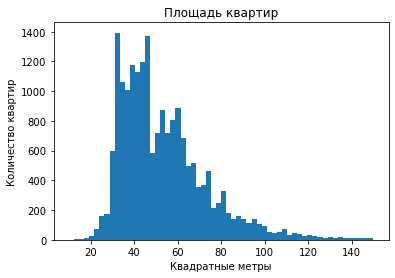

Наибольшие по площади варианты:


45.0    380
42.0    350
44.0    318
31.0    315
60.0    299
Name: total_area, dtype: int64

In [43]:
plt.hist(data['total_area'], bins=60, range=(10, 150))
plt.title('Площадь квартир')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()
print('Наибольшие по площади варианты:')
display(data['total_area'].value_counts().head())

Самые продаваемые по общей площади квартиры: от 31 до 60 кв.м.

**Жилая площадь**

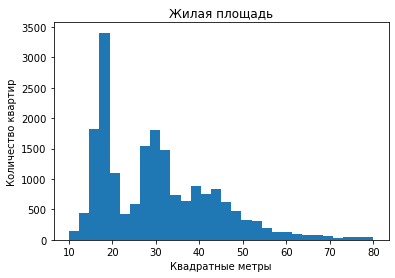

Наибольшие по жилой площади варианты:
18.0    826
17.0    622
30.0    547
16.0    454
20.0    419
Name: living_area, dtype: int64


In [44]:
plt.hist(data['living_area'], bins=30, range=(10,80))
plt.title('Жилая площадь')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()
print('Наибольшие по жилой площади варианты:')
print(data['living_area'].value_counts().head())

Самые продаваемые по жилой площади квартиры: от 16 до 30 кв.м.

**Площадь кухни**

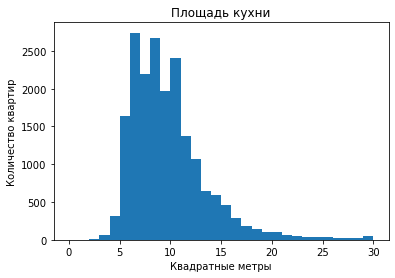

Наибольшие по площади кухни варианты:
6.0     1209
10.0    1043
7.0      978
9.0      927
8.0      912
Name: kitchen_area, dtype: int64


In [45]:
plt.hist(data['kitchen_area'], bins=30, range=(0,30))
plt.title('Площадь кухни')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()
print('Наибольшие по площади кухни варианты:')
print(data['kitchen_area'].value_counts().head())

Самые продаваемые по площади кухни квартиры: от 6 до 10 кв.м.

**Цена объекта**

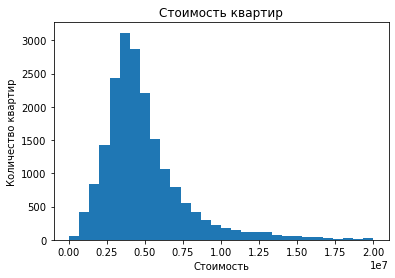

Наибольшие по цене варианты:


4500000    316
3500000    267
3600000    241
4300000    233
4000000    230
Name: last_price, dtype: int64

In [46]:
plt.hist(data['last_price'], bins=30, range=(0,20000000))
plt.title('Стоимость квартир')
plt.xlabel('Стоимость')
plt.ylabel('Количество квартир')
plt.show()
print('Наибольшие по цене варианты:')
display(data['last_price'].value_counts().head())

Самые продаваемые по своей стоимости квартиры: от 3,5 до 4,5 млн.руб.

**Количество комнат**

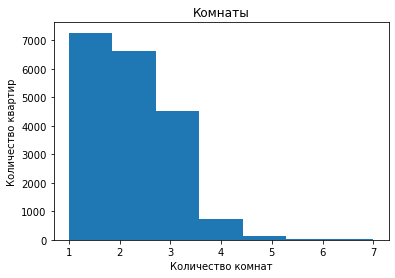

Наибольшие по числу комнат варианты:
1    7263
2    6612
3    4531
4     725
0     179
Name: rooms, dtype: int64


In [47]:
plt.hist(data['rooms'], bins=7, range=(1,7))
plt.title('Комнаты')
plt.xlabel('Количество комнат')
plt.ylabel('Количество квартир')
plt.show()
print('Наибольшие по числу комнат варианты:')
print(data['rooms'].value_counts().head())

Самые продаваемые по количеству комнат квартиры: 1-, 2- и 3-х комнатные

**Этаж квартиры**

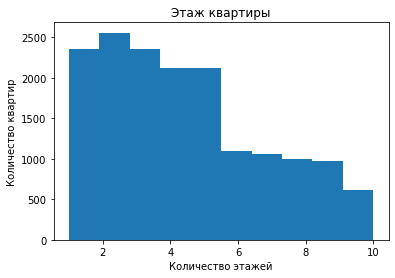

Наибольшие по этажу варианты:
2    2558
1    2356
3    2353
4    2125
5    2116
Name: floor, dtype: int64


In [48]:
plt.hist(data['floor'], bins=10, range=(1,10))
plt.title('Этаж квартиры')
plt.xlabel('Количество этажей')
plt.ylabel('Количество квартир')
plt.show()
print('Наибольшие по этажу варианты:')
print(data['floor'].value_counts().head())

Самые продаваемые по своей этажности квартиры: с первого по пятый

**Высота потолков**

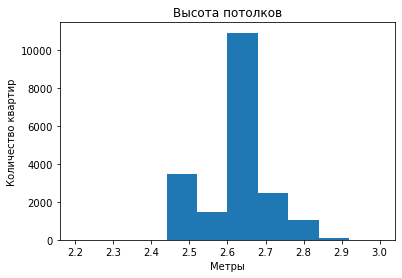

Наибольшие по высоте потолков варианты:
2.65    9176
2.50    3415
2.60    1593
2.70    1495
2.55     935
Name: ceiling_height, dtype: int64


In [49]:
plt.hist(data['ceiling_height'], bins=10, range=(2.2, 3))
plt.title('Высота потолков')
plt.xlabel('Метры')
plt.ylabel('Количество квартир')
plt.show()
print('Наибольшие по высоте потолков варианты:')
print(data['ceiling_height'].value_counts().head())

Самые продаваемые квартиры по высоте потолков: 2,65 м.

**Общее количество этажей**

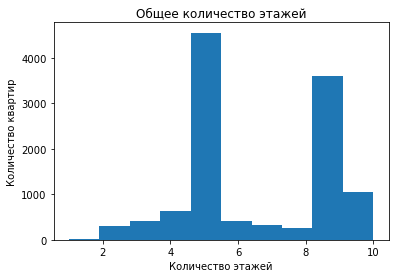

Наибольшие по количеству этажей варианты:
5.0     4558
9.0     3595
12.0    1252
16.0    1241
10.0    1050
25.0    1043
17.0     744
4.0      632
14.0     496
18.0     485
Name: floors_total, dtype: int64


In [50]:
plt.hist(data['floors_total'], bins=10, range=(1, 10))
plt.title('Общее количество этажей')
plt.xlabel('Количество этажей')
plt.ylabel('Количество квартир')
plt.show()
print('Наибольшие по количеству этажей варианты:')
print(data['floors_total'].value_counts().head(10))

Самые продаваемые квартиры: в 5ти и 9ти этажках

**Расстояние до центра города**

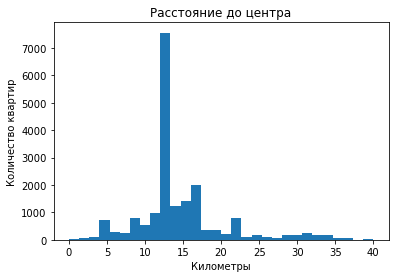

Наибольшие по расстоянию варианты:
13.0    5988
12.0    1569
15.0    1433
14.0    1237
16.0    1152
Name: city_centers_nearest_km, dtype: int64


In [51]:
plt.hist(data['city_centers_nearest_km'], bins=30, range=(0, 40))
plt.title('Расстояние до центра')
plt.xlabel('Километры')
plt.ylabel('Количество квартир')
plt.show()
print('Наибольшие по расстоянию варианты:')
print(data['city_centers_nearest_km'].value_counts(ascending = False).head())

Самые продаваемые по удаленности от центра квартиры: от 12ти до 16ти километров

**Расстояние до ближайшего аэропорта**

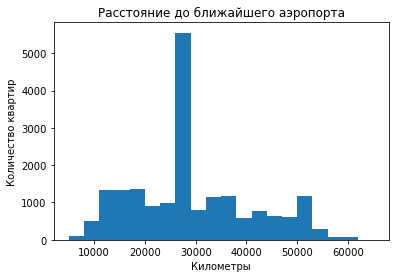

Наибольшие по расстоянию варианты:
27223    4602
51553     583
26757      57
21928      32
61908      24
Name: airports_nearest, dtype: int64


In [52]:
plt.hist(data['airports_nearest'], bins=20, range=(5000, 65000))
plt.title('Расстояние до ближайшего аэропорта')
plt.xlabel('Километры')
plt.ylabel('Количество квартир')
plt.show()
print('Наибольшие по расстоянию варианты:')
print(data['airports_nearest'].value_counts().head())

Самые продаваемые квартиры располагаются в 27ми километрах от аэропорта

**Расстояние до ближайшего парка**

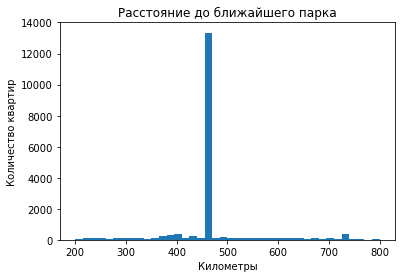

Наибольшие по расстоянию варианты:
460    13227
733      313
393      186
399      148
428      140
Name: parks_nearest, dtype: int64


In [53]:
plt.hist(data['parks_nearest'], bins=40, range=(200, 800))
plt.title('Расстояние до ближайшего парка')
plt.xlabel('Километры')
plt.ylabel('Количество квартир')
plt.show()
print('Наибольшие по расстоянию варианты:')
print(data['parks_nearest'].value_counts().head())

С большим преимуществом побеждают квартиры в 460ти метрах от парка

**Цена за квадратный метр**

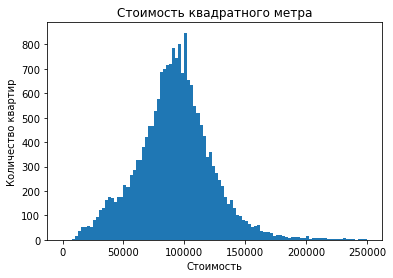

Наибольшие по цене за квадрат варианты:
100000.0    217
83333.3      66
75000.0      54
50000.0      47
80000.0      46
125000.0     45
66666.7      44
90000.0      44
90909.1      33
120000.0     32
Name: price_per_square_meter, dtype: int64


In [54]:
plt.hist(data['price_per_square_meter'], bins=100, range=(0,250000))
plt.title('Стоимость квадратного метра')
plt.xlabel('Стоимость')
plt.ylabel('Количество квартир')
plt.show()
print('Наибольшие по цене за квадрат варианты:')
print(data['price_per_square_meter'].round(1).value_counts().head(10))

Средняя стоимость квадратного метра в самых продаваемых квартирах: 100 тыс.руб.

**Продажа квартир по годам**

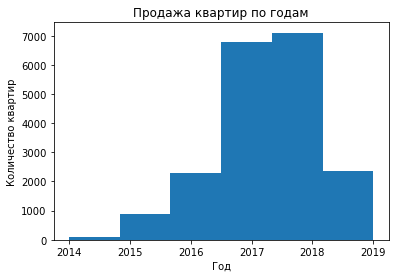

Лучшие года по продажам:
2018    7102
2017    6800
2019    2350
2016    2277
2015     885
Name: year_exposition, dtype: int64


In [55]:
plt.hist(data['year_exposition'], bins=6)
plt.title('Продажа квартир по годам')
plt.xlabel('Год')
plt.ylabel('Количество квартир')
plt.show()
print('Лучшие года по продажам:')
print(data['year_exposition'].value_counts().head())

Период с 2018го по 2019ый года стал самым успешным для риэлторов

**Продажа квартир по месяцам**

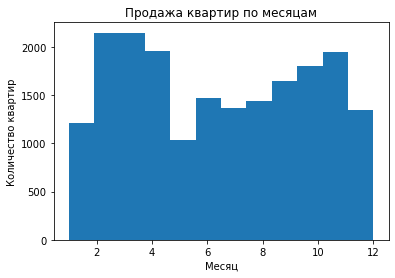

Лучшие месяцы по продажам:
2     2148
3     2145
4     1954
11    1952
10    1798
9     1649
Name: month_exposition, dtype: int64


In [56]:
plt.hist(data['month_exposition'], bins=12)
plt.title('Продажа квартир по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Количество квартир')
plt.show()
print('Лучшие месяцы по продажам:')
print(data['month_exposition'].value_counts().head(6))

Наблюдаются 2 временных отрезка с наилучшими продажами:
* февраль-апрель
* сентябрь-ноябрь

**Время продажи квартиры**

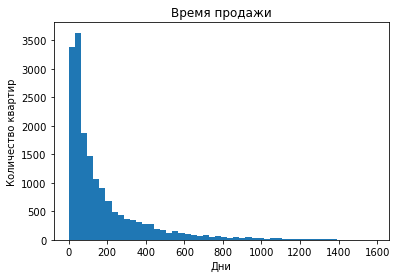

In [57]:
plt.hist(data['days_exposition'], bins=50)
plt.title('Время продажи')
plt.xlabel('Дни')
plt.ylabel('Количество квартир')
plt.show()

Увеличим масштаб

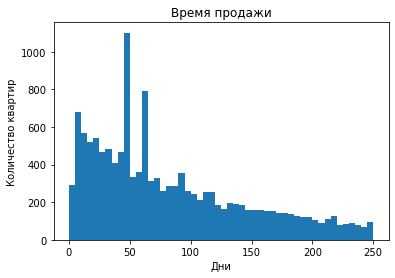

Самые быстрые продажи:
45.0    825
60.0    466
7.0     201
30.0    176
4.0     146
Name: days_exposition, dtype: int64


In [58]:
plt.hist(data['days_exposition'], bins=50, range=(0, 250))
plt.title('Время продажи')
plt.xlabel('Дни')
plt.ylabel('Количество квартир')
plt.show()
print('Самые быстрые продажи:')
print(data['days_exposition'].value_counts().head())

In [59]:
print('Среднее значение:', data['days_exposition'].mean())
print('Медианное значение:', data['days_exposition'].median())

Среднее значение: 169.59860965066014
Медианное значение: 90.00000000000001


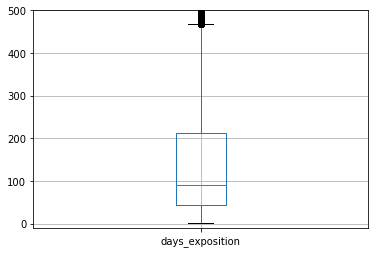

In [60]:
plt.ylim(-10, 500)
data.boxplot(column='days_exposition')
plt.show()

* Среднее время продажи: 100 дней
* Самые быстрые продажи: 45, 60 и 7 дней
* Необычно долгими можно считать продажи более 200 дней 

**Зависимость цены квартиры от разных факторов**

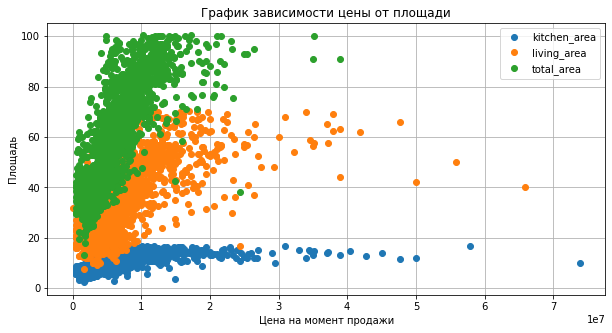

Корреляция, общая площадь: 0.6713733491148798
Корреляция, жилая площадь: 0.555506531786099
Корреляция, площадь кухни: 0.4832885502086789



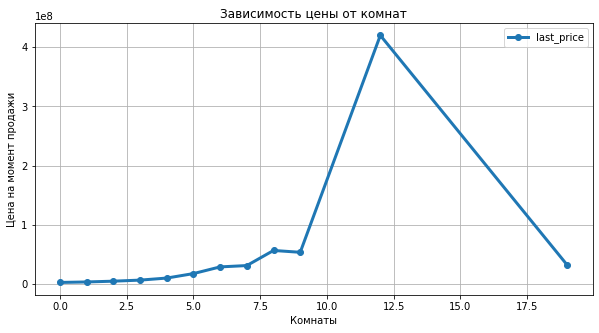

Корреляция: 0.35387350993675837



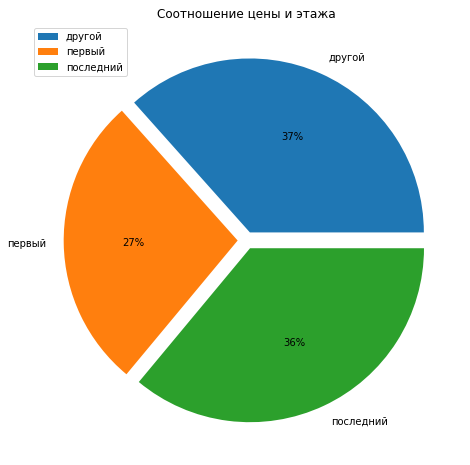

Корреляция: 0.09008292385460903



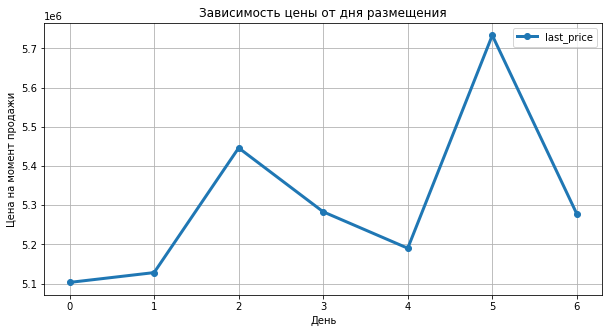

Корреляция: 0.014097183440606906



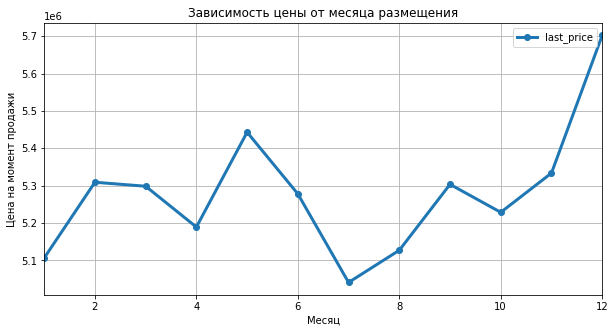

Корреляция: 0.008552815127323267



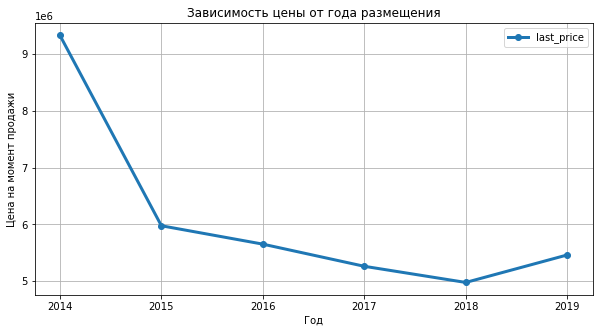

Корреляция: -0.034368454380312836



In [61]:
# Площадь
# удалю выбросы для наглядности
sort_list = ['total_area', 'living_area','kitchen_area']

for col in sort_list:
    data[col] = func_quart(data, col)

(
    data.pivot_table(index='last_price', values=['total_area','living_area','kitchen_area'])
    .plot(style='o',grid=True, figsize=(10, 5), title='График зависимости цены от площади')
)

plt.xlabel('Цена на момент продажи')
plt.ylabel('Площадь')
plt.show()

# Рассчитаем корреляцию Пирсона
print('Корреляция, общая площадь:', data['total_area'].corr(data['last_price']))
print('Корреляция, жилая площадь:', data['living_area'].corr(data['last_price']))
print('Корреляция, площадь кухни:', data['kitchen_area'].corr(data['last_price']))
print()

# Комнаты
(
    data.pivot_table(index='rooms', values='last_price')
    .plot(grid=True, style='o-', figsize=(10, 5), linewidth=3, title='Зависимость цены от комнат')
)
plt.xlabel('Комнаты')
plt.ylabel('Цена на момент продажи')
plt.show()

print('Корреляция:', data['rooms'].corr(data['last_price']))
print()

# Этаж
explode = (0.05, 0.05, 0.05)
#(
#    data.pivot_table(index='floor_category', values='last_price', aggfunc='count').plot
#    .pie(y='last_price', figsize=(8,8),    label='', title='Соотношение цены и этажа', autopct='%1.0f%%', explode=explode)
#)
#plt.show()

(
    data.pivot_table(index='floor_category', values='last_price').plot
    .pie(y='last_price', figsize=(8,8),    label='', title='Соотношение цены и этажа', autopct='%1.0f%%', explode=explode)
)
plt.show()

print('Корреляция:', data['floor'].corr(data['last_price']))
print()

# День
(
    data.pivot_table(index='weekday_exposition', values='last_price')
    .plot(grid=True, style='o-', figsize=(10, 5), linewidth=3, title='Зависимость цены от дня размещения')
)
plt.xlabel('День')
plt.ylabel('Цена на момент продажи')
plt.show()

print('Корреляция:', data['weekday_exposition'].corr(data['last_price']))
print()

# Месяц
(
    data.pivot_table(index='month_exposition', values='last_price')
    .plot(grid=True, style='o-', xlim=(1,12), figsize=(10, 5), linewidth=3, title='Зависимость цены от месяца размещения')
)
plt.xlabel('Месяц')
plt.ylabel('Цена на момент продажи')
plt.show()

print('Корреляция:', data['month_exposition'].corr(data['last_price']))
print()

# Год
(
    data.pivot_table(index='year_exposition', values='last_price')
    .plot(grid=True, style='o-', figsize=(10, 5), linewidth=3, title='Зависимость цены от года размещения')
)
plt.xlabel('Год')
plt.ylabel('Цена на момент продажи')
plt.show()

print('Корреляция:', data['year_exposition'].corr(data['last_price']))
print()

Графики наглядные, а вот коэффициент корреляции мало о чем говорит: даешь визуализацию!

In [62]:
# создадим свой датафрейм с интересующими нас столбцами
corr_data = data[['last_price', 'total_area', 'living_area', 'kitchen_area', 'rooms', 'floor', \
                    'weekday_exposition', 'month_exposition', 'year_exposition']].corr()

# посмотрим в цвете
display(
        corr_data
        .T
        .style
        .format("{:.2f}")
        .background_gradient(cmap='Blues')
)

,last_price,total_area,living_area,kitchen_area,rooms,floor,weekday_exposition,month_exposition,year_exposition
last_price,1.00,0.67,0.56,0.48,0.35,0.09,0.01,0.01,-0.03
total_area,0.67,1.00,0.90,0.48,0.80,0.02,-0.01,0.01,-0.05
living_area,0.56,0.90,1.00,0.23,0.89,-0.08,-0.00,0.01,-0.05
kitchen_area,0.48,0.48,0.23,1.00,0.13,0.26,-0.01,0.02,-0.04
rooms,0.35,0.80,0.89,0.13,1.00,-0.13,0.01,-0.00,-0.04
floor,0.09,0.02,-0.08,0.26,-0.13,1.00,0.01,0.02,-0.00
weekday_exposition,0.01,-0.01,-0.00,-0.01,0.01,0.01,1.00,0.01,-0.00
month_exposition,0.01,0.01,0.01,0.02,-0.00,0.02,0.01,1.00,-0.27
year_exposition,-0.03,-0.05,-0.05,-0.04,-0.04,-0.00,-0.00,-0.27,1.00


**Площадь**
    
* Чем больше площадь (общая, жилая, кухня) - тем дороже квартира
    
**Комнаты**
    
* С увеличением комнат растет и цена недвижимости
    
* После 11ти комнатных квартир цена заметно падает    
    
Остальные критерии продажи на смоимость недвижимости СПб влияют очень слабо

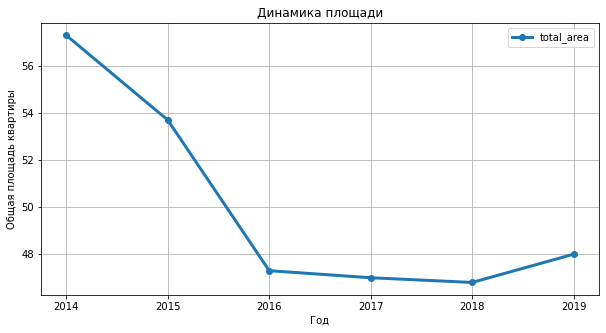

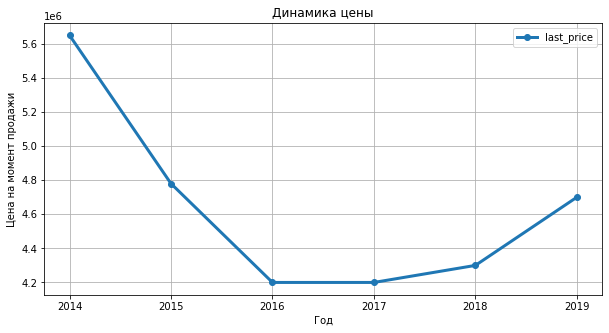


Корреляция: 0.6713733491148798


In [63]:
(
    data.pivot_table(index='year_exposition', values='total_area', aggfunc='median')
    .plot(grid=True, style='o-', figsize=(10, 5), linewidth=3, title='Динамика площади')
)
plt.xlabel('Год')
plt.ylabel('Общая площадь квартиры')
plt.show()

(
    data.pivot_table(index='year_exposition', values='last_price', aggfunc='median')
    .plot(grid=True, style='o-', figsize=(10, 5), linewidth=3, title='Динамика цены')
)
plt.xlabel('Год')
plt.ylabel('Цена на момент продажи')
plt.show()

print()
print('Корреляция:', data['total_area'].corr(data['last_price']))

с 2014 по 2018 наблюдается заметное снижение общей площади продаваемых квартир, отсюда и резкое падение цены продаж

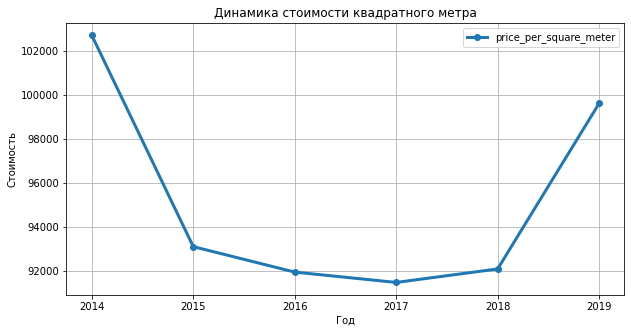


Корреляция: 0.6017158295988466


In [64]:
(
    data.pivot_table(index='year_exposition', values='price_per_square_meter')
    .plot(grid=True, style='o-', figsize=(10, 5), linewidth=3, title='Динамика стоимости квадратного метра')
)
plt.xlabel('Год')
plt.ylabel('Стоимость')
plt.show()

print()
print('Корреляция:', data['price_per_square_meter'].corr(data['last_price']))

Судя по всему, в 2017 году была стабилизация рынка недвижимости

In [65]:
# Топ-10 локаций по количеству объявлений
top_10 = (
    data.pivot_table(index='locality_name', values=['first_day_exposition'], aggfunc='count')
    .sort_values(by='first_day_exposition', ascending=False).head(10)
)

top_10.columns=['Количество объявлений']

top_10['Средняя цена кв.м.'] = data.pivot_table(index='locality_name', values='price_per_square_meter', aggfunc='mean')
data_top_10 = top_10.style.format({'Средняя цена кв.м.':'{:.2f} ₽'})

display(data_top_10
    .highlight_max(color='yellowgreen', subset='Средняя цена кв.м.')
    .highlight_min(color='coral', subset='Средняя цена кв.м.')
)

,Количество объявлений,Средняя цена кв.м.
locality_name,,
Санкт-Петербург,12261,107626.26 ₽
Мурино,583,86078.90 ₽
Кудрово,468,95366.74 ₽
Шушары,437,78648.67 ₽
Всеволожск,382,68656.64 ₽
Парголово,314,90681.62 ₽
Гатчина,287,68433.19 ₽
Колпино,282,75866.20 ₽
Пушкин,265,99189.15 ₽


**ТОП-1: Санкт-Петербург**
* Объявлений 12 231
* Средняя цена за квадратный метр 108 тыс.руб.

**ТОП-10: Выборг**
* Объявлений 211
* Средняя цена за квадратный метр 58 тыс.руб.

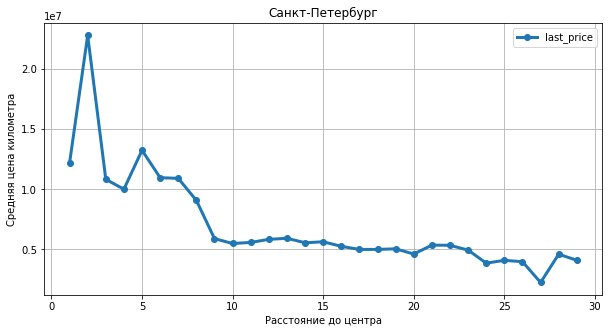

,last_price
city_centers_nearest_km,
2.0,2.279577e+07
5.0,1.323803e+07
1.0,1.218212e+07
6.0,1.096105e+07
7.0,1.090503e+07
3.0,1.082254e+07
4.0,1.000419e+07
8.0,9.072345e+06
13.0,5.922703e+06


In [66]:
# Узнаем как стоимость объектов зависит от расстояния до центра города
price_by_nearest = (
    data.query('locality_name == "Санкт-Петербург"')
    .pivot_table(index='city_centers_nearest_km', values='last_price', aggfunc='mean')
    )
# price_by_nearest = price_by_nearest.rename(columns={'city_centers_nearest_km': 'Расстояние до центра', 'last_price': 'Средняя цена километра'})
price_by_nearest.plot(grid=True, style='o-', figsize=(10, 5), linewidth=3, title='Санкт-Петербург')
plt.xlabel('Расстояние до центра')
plt.ylabel('Средняя цена километра')
plt.show()

display(price_by_nearest.sort_values(by= 'last_price', ascending=False))

Центральная зона - это до 7ми километров к центру города: дальше цена снижается.

### Общий вывод

По данному первому самостоятельному проекту мной была проделана огромная работа. В дальнейшем следует обратить внимание коллег по подготовке и сбору данных на заполняемость ячеек, либо на корректность выгрузки данных из программы. Ошибок связанных с человеческим фактором довольно мало, что облегчило процесс предобработки материала для анализа.

Поставленные цели выполнены в полном объеме:
* Пропуски были заполнены максимально возможными способами
* Были определены аномалии
* Приведены типы данных для уменьшения используемой памяти и отображаемого вида в таблице
* Созданы дополнительные столбцы для улучшения анализа данных
* Даны ответы на поставленные вопросы


Недвижимость в Санкт-Петербурге:
- Объекты в городе стоят дороже остальных близлежащих населенных пунктов
- Чем ближе к центру города - тем дороже, в самом городе цены схожи
- Факторы, влияющие на стоимость:
    - площадь (общая, жилая, кухня)
    - количество комнат
    
А вот дата размещения объявления о продаже на цене практически не отображается


**Итог**

Критерии успешной продажи:

* общая площадь: 31 ... 60 кв.м.
* жилая площадь: 16 ... 30 кв.м.
* площадь кухни: 6 ... 10 кв.м.
* количество комнат: 1 ... 3
* высота потолков: 2,65 м
* этажность дома: 5, 9
* этаж: 1 ... 5
* удаленность:
    * центр города: 12 ... 16 км
    * аэропрт: до 27 км
    * парк: до 460 м
* стоимость: 3,5 ... 4,5 млн.руб (100 тыс.руб. за кв.м.)
